# Setup

💡 = some conclusion is drawn from data<br/>
⚡ = some decision is made 

TO DO:<br/>
1. replace emojis
2. unicode normalize
3. proveri da li su i u originalnom fajlu neki reviewi odseceni
4. korelacija izmedju recommended ind i rating (eda notebook)
5. dodaj skriptu za cleaning (preprocessing)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import data_table

In [4]:
df = pd.read_csv('train.csv')
df.head(5)

,Review ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1214,1094,52,Great dress but not in green,Beautiful dress. good quality. tts. i'm 5 feet...,3,1,1,General,Dresses,Dresses
1,1917,1066,72,"Love! but more tall options, please!",These pants are so great. i am 5'10 and the ta...,5,1,11,General Petite,Bottoms,Pants
2,18277,854,39,Love it!,"I bought a size s in the navy, and m in the ne...",5,1,0,General,Tops,Knits
3,10757,864,34,Runs big but cute buy on sale,Loved this shirt but it runs pretty big. i'm n...,3,1,1,General Petite,Tops,Knits
4,10782,1110,43,Looks better than the picture!,I love this dress! i was trying on some dresse...,5,1,0,General Petite,Dresses,Dresses


In [5]:
len(df)

18788

# Check empty values

In [6]:
df.dtypes

Review ID                   int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [7]:
print(len(df[df['Title'] == None]))
print(len(df[df['Review Text'] == None]))

0
0


String columns should be converted to str type because object type can represent multiple types

In [8]:
df['Review Text'] = df['Review Text'].values.astype(str)
df['Title'] = df['Title'].values.astype(str)

In [9]:
print(len(df[df['Title'] == '']))
print(len(df[df['Review Text'] == '']))

0
0


In [10]:
df['Title'].value_counts()

nan                                    3036
Love it!                                104
Beautiful                                72
Love                                     70
Love!                                    65
                                       ... 
Fabulous tank                             1
Comfy & casual                            1
Great suit!                               1
Everyone loves this dress!                1
Love the flow and hem on this skirt       1
Name: Title, Length: 11456, dtype: int64

In [11]:
df[df['Title'] == 'nan'].head()

,Review ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
5,18801,1047,63,nan,Purchased these in the blue motif. love the he...,5,1,9,General,Bottoms,Pants
6,11463,1072,39,nan,Adorable denim dress! fabric is lighter than i...,5,1,0,General,Dresses,Dresses
9,5454,909,41,nan,This sweater is very pretty. the pictures onli...,5,1,0,General,Tops,Fine gauge
18,6077,1110,63,nan,I live in hawaii and always looking for a comf...,5,1,0,General Petite,Dresses,Dresses
37,22092,984,26,nan,I love this denim jacket! it's just a basic li...,5,1,4,General,Jackets,Jackets


In [12]:
df['Review Text'].value_counts()

nan                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       672
The sweater and skirt are so pretty! they're really soft and have such an easy, comfortable look together. really love this gorgeous outfit.\n\ni am borderline small/medium and kept the size small after trying both on.                                                                                                                                                                                                                                                                                

'nan' is same as empty string

In [13]:
df['Title'] = df['Title'].apply(lambda x: '' if x == 'nan' else x)

In [14]:
df['Title'].value_counts()

                                 3036
Love it!                          104
Beautiful                          72
Love                               70
Love!                              65
                                 ... 
Cute & simple                       1
This one falls short                1
Stunning and sexy                   1
Want to love it, poor quality       1
True comparison                     1
Name: Title, Length: 11456, dtype: int64

In [15]:
len(df[(df['Review Text'] == 'nan') & (df['Title'] != '')])

0

💡 When review is empty, title is also empty 

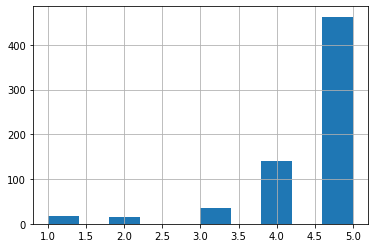

In [16]:
df[df['Review Text'] == 'nan']['Rating'].hist()

💡 No correlation between empty reviews and rating

⚡ Remove empty reviews

In [17]:
len(df)

18788

In [18]:
df = df[df['Review Text'] != 'nan']

In [19]:
len(df)

18116

# Check duplicate reviews

In [20]:
review_text_counts_df = df['Review Text'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [21]:
len(review_text_counts_df[review_text_counts_df['counts'] > 1])

3

In [22]:
for review in review_text_counts_df[review_text_counts_df['counts'] > 1]['unique_values']:
  print(review)
  print('---------------------------------------')

Love, love these jeans. being short they come right to my ankle. super soft and don?t require any hemming. i ordered my typical jean size of 26 and they fit like a glove. would love to have these in black and grey.
---------------------------------------
The sweater and skirt are so pretty! they're really soft and have such an easy, comfortable look together. really love this gorgeous outfit.

i am borderline small/medium and kept the size small after trying both on.
---------------------------------------
Lightweight, soft cotton top and shorts. i think it's meant to be a beach cover-up but i'm wearing it as a thin, light-weight summer outfit on these hot hot days. the top has a loose elastic around the bottom which i didn't realize when i ordered it, but i like it and it matches the look in the photos. and the shorts are very low-cut - don't expect them up around your waist. again, i like that. some might want to wear a cami underneath because it's a thin cotton but i'm fine as-is. i

In [23]:
df[df['Review Text'].isin(review_text_counts_df[review_text_counts_df['counts'] > 1]['unique_values'])]

,Review ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2527,21888,1022,37,,"Love, love these jeans. being short they come ...",5,1,0,General,Bottoms,Jeans
5045,10708,632,60,Cute cover-up or summer top & shorts!,"Lightweight, soft cotton top and shorts. i thi...",5,1,8,Initmates,Intimate,Lounge
6497,11074,628,60,Cute cover-up or summer top & shorts!,"Lightweight, soft cotton top and shorts. i thi...",5,1,2,Initmates,Intimate,Lounge
13910,16988,993,60,Soft & beautiful!,The sweater and skirt are so pretty! they're r...,5,1,1,General,Bottoms,Skirts
15356,9447,1022,37,,"Love, love these jeans. being short they come ...",5,1,0,General,Bottoms,Jeans
18558,21470,895,60,Soft & beautiful!,The sweater and skirt are so pretty! they're r...,5,1,5,General Petite,Tops,Fine gauge


⚡ No need to keep duplicate reviews

In [24]:
len(df)

18116

In [25]:
df.drop_duplicates(subset='Review Text', inplace=True)

In [26]:
len(df)

18113

# Fix whitespaces

In [27]:
df['Review Text'].str.contains('\n').sum()

1634

In [28]:
df['Review Text'] = df['Review Text'].apply(lambda x: ' '.join(x.split()))

In [29]:
df['Review Text'].str.contains('\n').sum()

0

# Check shortest/longest reviews and titles

In [30]:
df['Title Length'] = df['Title'].apply(lambda x: len(x.split()))
df['Review Length'] = df['Review Text'].apply(lambda x: len(x.split()))

In [31]:
df.head()

,Review ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Length,Review Length
0,1214,1094,52,Great dress but not in green,Beautiful dress. good quality. tts. i'm 5 feet...,3,1,1,General,Dresses,Dresses,6,56
1,1917,1066,72,"Love! but more tall options, please!",These pants are so great. i am 5'10 and the ta...,5,1,11,General Petite,Bottoms,Pants,6,82
2,18277,854,39,Love it!,"I bought a size s in the navy, and m in the ne...",5,1,0,General,Tops,Knits,2,69
3,10757,864,34,Runs big but cute buy on sale,Loved this shirt but it runs pretty big. i'm n...,3,1,1,General Petite,Tops,Knits,7,51
4,10782,1110,43,Looks better than the picture!,I love this dress! i was trying on some dresse...,5,1,0,General Petite,Dresses,Dresses,5,105


In [32]:
df.sort_values('Title Length', ascending=False).head()

,Review ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Length,Review Length
5056,8121,833,51,It's not a black and white top - it's ecru and...,I suppose i would have kept this top i hadn't ...,3,0,3,General,Tops,Blouses,12,29
10189,18717,829,28,If you have red hair you have to get this in k...,This top is soft feeling and i appreciate that...,5,1,0,General,Tops,Blouses,12,55
12433,10523,1110,63,The print is a work of art - i love this dress,The delicate print and coloring are stunning. ...,5,1,2,General,Dresses,Dresses,12,93
2060,18675,1068,65,Love the style - hate the dye left on my skin,"I recommend this product, but with the followi...",2,1,0,General Petite,Bottoms,Pants,11,66
11530,11042,1093,46,Gorgeous dress - but a little heavy for a hot day,"Ordered this online in a petite 4. (i'm 5'3""/1...",5,1,4,General,Dresses,Dresses,11,98


In [33]:
df[df['Title Length'] > 0].sort_values('Title Length', ascending=True).head(10)

,Review ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Length,Review Length
4347,3263,1011,31,Feminine,I love the print and style of the skirt. it is...,4,1,0,General,Bottoms,Skirts,1,97
13636,18709,864,34,Love!,I wore this for the first time today and got s...,5,1,0,General,Tops,Knits,1,86
13225,16682,1110,33,Effortless!,I tried this on a whim during the sale with no...,5,1,1,General,Dresses,Dresses,1,102
9519,7067,862,50,Lightweight,"This lift weight cardigan is true to size, per...",3,1,0,General,Tops,Knits,1,23
15565,17509,1086,26,Love!,I love this dress. i'm 6' so it's a tad bit sh...,4,1,1,General,Dresses,Dresses,1,70
1702,6171,873,48,Love,I am very petite and ordered the xs. it is too...,5,1,2,General,Tops,Knits,1,106
3473,18661,838,41,Oversized,This shirt fit really really big! i ordered an...,3,1,7,General Petite,Tops,Blouses,1,36
17991,15771,895,64,Crazy!,It's really crazy how much i like this sweater...,5,1,0,General Petite,Tops,Fine gauge,1,71
12114,5166,865,44,Perfect,This tank is perfect for summer since it pairs...,5,1,1,General,Tops,Knits,1,92
5381,2191,872,37,Amazing,This shirt looks and feels fabulous. i got bla...,5,1,0,General,Tops,Knits,1,25


💡 No insights from Title Length

In [42]:
data_table.enable_dataframe_formatter()
df.sort_values('Review Length', ascending=False).head()

,Review ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Length,Review Length
1074,16880,834,63,,I love maeve tops. i love the material and fee...,3,0,3,General,Tops,Blouses,0,115
11277,12731,1110,49,Couldn't wait to see this in person!,I had my eye on this dress since it fist came ...,5,1,1,General,Dresses,Dresses,7,114
11060,15508,1099,43,Romantic and pretty,I was walking to the fitting room and i saw tw...,5,1,5,General Petite,Dresses,Dresses,3,114
4789,13361,975,54,Pleasant surprise!,This outfit was online for months with no revi...,5,1,1,General Petite,Jackets,Jackets,2,112
13874,6697,865,53,"Odd fit, beautiful design but poor execution",I wanted to love this blouse so much. but try ...,1,0,7,General,Tops,Knits,7,111


💡 Seems like longest reviews are truncated :/ also in original file :(

In [43]:
data_table.disable_dataframe_formatter()
df.sort_values('Review Length', ascending=True).head(10)

,Review ID,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Length,Review Length
18689,859,886,27,,Great style!,5,1,1,General Petite,Tops,Knits,0,2
10704,13399,927,36,Buy this!,Fits perfect!,5,1,0,General Petite,Tops,Sweaters,2,2
2136,11518,1066,21,Beautiful pant,Great structure,5,1,0,General Petite,Bottoms,Pants,2,2
18059,7785,820,50,Another beautiful white top,Great fit,5,1,0,General Petite,Tops,Blouses,4,2
2359,15653,1089,29,Perfect bride dress,Fits perfect.,5,1,0,General,Dresses,Dresses,3,2
7258,17317,1022,60,Comfy yer dressy,Love these jeans.,5,1,0,General,Bottoms,Jeans,3,3
6367,5925,862,55,,Beautiful and delicate!!,5,1,3,General,Tops,Knits,0,3
9696,7521,941,54,Great pullover !,Soft and sweet,5,1,0,General Petite,Tops,Sweaters,3,3
17710,9121,414,61,,"Very pretty, romantic",3,0,3,Initmates,Intimate,Sleep,0,3
14177,23041,687,30,A little short,Overall very pretty.,5,1,1,Initmates,Intimate,Intimates,3,3


💡 Reviews is 'Very pretty, romantic' and rating is 3 :/ 

# Save cleaned dataset

In [44]:
df.to_csv('train_clean.csv', index=False)